# FQI on Car On Hill

## Define parameters

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import jax
import jax.numpy as jnp


gamma = 0.95
n_actions = 2

# Visualisation of errors and performances
n_states_x = 17
n_states_v = 17
horizon = 100

## Define environment

In [2]:
from pbo.environment.car_on_hill import CarOnHillEnv


max_pos = 1.0
max_velocity = 3.0

states_x = jnp.linspace(-max_pos, max_pos, n_states_x)
boxes_x_size = (2 * max_pos) / (n_states_x - 1)
states_x_boxes = (np.linspace(-max_pos, max_pos + boxes_x_size, n_states_x + 1) - boxes_x_size / 2)
states_v = jnp.linspace(-max_velocity, max_velocity, n_states_v)
boxes_v_size = (2 * max_velocity) / (n_states_v - 1)
states_v_boxes = (np.linspace(-max_velocity, max_velocity + boxes_v_size, n_states_v + 1) - boxes_v_size / 2)


env = CarOnHillEnv(max_pos, max_velocity, gamma)

## Compute optimal Q

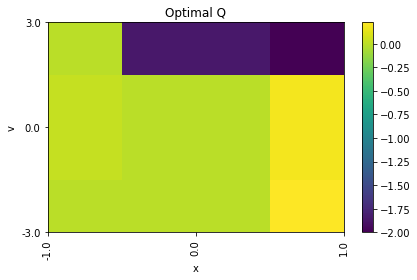

In [4]:
from tqdm.notebook import tqdm
from pbo.utils.two_dimesions_mesh import TwoDimesionsMesh


visu_mesh = TwoDimesionsMesh(states_x, states_v, sleeping_time=0, axis_equal=False)

optimal_q = np.zeros((n_states_x, n_states_v, n_actions))

for idx_state_x, state_x in enumerate(tqdm(states_x)):
    for idx_state_v, state_v in enumerate(tqdm(states_v, leave=False)):
        for idx_action, action in enumerate(range(n_actions)):
            env.reset(np.array([state_x, state_v]))
            next_state, reward, absorbing, _ = env.step(np.array([action]))

            optimal_q[idx_state_x, idx_state_v, idx_action] = reward[0] + (1 - absorbing[0]) * gamma * env.optimal_v(next_state, horizon)

visu_mesh.set_values(optimal_q[:, :, 1] - optimal_q[:, :, 0])
visu_mesh.show(
    "Optimal Q", xlabel="x", ylabel="v"
)

## Compute optimal V

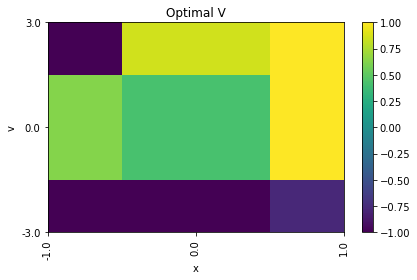

In [5]:
optimal_v = np.zeros((n_states_x, n_states_v))

for idx_state_x, state_x in enumerate(tqdm(states_x)):
    for idx_state_v, state_v in enumerate(tqdm(states_v, leave=False)):
        optimal_v[idx_state_x, idx_state_v] = env.optimal_v(np.array([state_x, state_v]), horizon)

visu_mesh.set_values(optimal_v)
visu_mesh.show(
    "Optimal V", xlabel="x", ylabel="v"
)

## Save the data

In [ ]:
np.save(f"figures/data/optimal/Q.npy", optimal_q)
np.save(f"figures/data/optimal/V.npy", optimal_v)